In [1]:
import os
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [7]:
Load = np.zeros(1681)
for i in range (600) :
    with open(f'/home/shreyas/ME504/project/femcode(DL_executed)/femcode(DL_executed)/cont_ver2/load1/load{i}.dat', 'r') as load:
        load1 = load.read()
    load_s = load1.split()
    load_a = np.array(load_s)

    load2 = np.array([])
    for i in range (16) :
        load2 = np.append(load2,float(load_a[i])) 
    
    load3 = np.zeros(1681)
    a = int(load2[8]) - 1
    b = int(load2[4]) - 1
    c = int(load2[0]) - 1
    load3[a] = load2[10]
    load3[b] = load2[6]
    load3[c] = load2[2]

    Load = np.vstack((Load,load3))
Load = np.delete(Load,0,0)
Load = Load.reshape(600,1681,1)
print(Load.shape)

(600, 1681, 1)


In [8]:
displacement = np.zeros(1681*3)
for i in range (600) :
    with open(f'/home/shreyas/ME504/project/femcode(DL_executed)/femcode(DL_executed)/cont_ver2/disp_L/displacement_L{i}', 'r') as disp:
        disp1 = disp.read()
    disp_s = disp1.split()
    disp_a = np.array(disp_s)

    disp2 = np.array([])
    for i in range (6724) :
        disp2 = np.append(disp2,float(disp_a[i])) 
    
    disp_r = np.reshape(disp2,(1681,4))
    disp_x = disp_r[:,1]
    disp_y = disp_r[:,2]
    disp_z = disp_r[:,3]
    displace = np.hstack((disp_x,disp_y,disp_z))
    displacement = np.vstack((displacement,displace))

Displacement = np.delete(displacement,0,0)

Displacement = Displacement.reshape(600,5043,1)
print(Displacement.shape)

(600, 5043, 1)


In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.layers import  Conv1D, MaxPooling1D, Flatten, Dense, concatenate,Reshape
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

2024-05-13 07:08:59.016557: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 07:08:59.017879: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 07:08:59.053167: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 07:08:59.229819: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 07:08:59.915111: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Load, Displacement, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 1681, 1), (120, 1681, 1), (480, 5043, 1), (120, 5043, 1))

In [15]:
tf.keras.backend.clear_session()

In [16]:
network1d = keras.Sequential()
network1d.add(Conv1D(filters=70, kernel_size=2, activation='relu', input_shape=(1681,1)))
network1d.add(Conv1D(filters=70, kernel_size=2, activation='relu'))
network1d.add(Flatten())
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=5043))
network1d.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1680, 70)       │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1679, 70)       │         9,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 117530)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    30,087,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5043)           │     1,296,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,920,403 (121.77 MB)

 Trainable params: 31,920,403 (121.77 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
network1d.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])  # Use mean squared error (mse) for regression

In [18]:
history=network1d.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 284.5637 - mae: 10.3612 - val_loss: 11.9059 - val_mae: 2.5768
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 9.8016 - mae: 2.3114 - val_loss: 4.3226 - val_mae: 1.4894
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 3.1252 - mae: 1.2679 - val_loss: 2.4145 - val_mae: 1.1003
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 1.7553 - mae: 0.9346 - val_loss: 1.9880 - val_mae: 0.9332
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 1.0122 - mae: 0.6877 - val_loss: 1.6829 - val_mae: 0.8417
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 0.6310 - mae: 0.5355 - val_loss: 1.5122 - val_mae: 0.7768
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.4150 - mae: 0.4371 - val_loss: 1.8881 - val_mae: 0.8273
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.2628 - mae: 0.3591 - val_loss: 1.6589 - val_mae: 0.7370
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 13

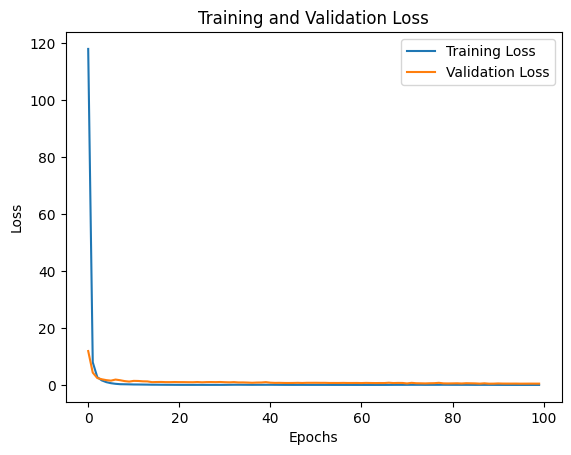

In [19]:
# Plot epochs vs. loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()